In [55]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine, load_iris
import matplotlib.pyplot as plt

In [56]:
X, Y = load_wine(return_X_y=True)

In [57]:
X.shape, Y.shape, type(X)

((178, 13), (178,), numpy.ndarray)

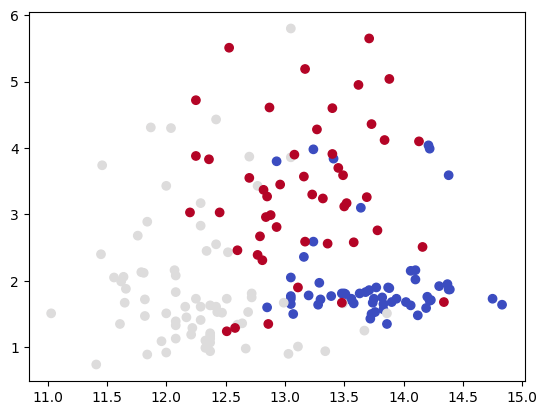

In [58]:
plt.scatter(X[:, 0], X[:,1], c=Y, cmap="coolwarm")

In [59]:
Y = Y.reshape((1, -1))
X = X.T         # cause neural Network expects features as row
Y.shape, X.shape

((1, 178), (13, 178))

In [60]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [61]:
def initializeParams(input_layer_size:int, hidden_layer_size:int, output_layer_size:int, showSize=False) -> dict:
    w1 = np.random.randn(hidden_layer_size, input_layer_size)
    w2 = np.random.randn(output_layer_size, hidden_layer_size)
    b1 = np.zeros((hidden_layer_size, 1))
    b2 = np.zeros((output_layer_size, 1))

    if showSize:
        print((w1.shape, b1.shape), '\t', (w2.shape, b2.shape))

    return {"W1": w1, "b1": b1, "W2": w2, "b2": b2}

In [62]:
import copy

In [63]:
class NeuralNetwork:
    def __init__(self, X, Y, n_x, n_h, n_y):
        self.params = initializeParams(n_x, n_h, n_y)
        self.X = X
        self.Y = Y
    
    def forward_prapagation(self, X) -> dict:
        w1 = self.params["W1"]
        b1 = self.params["b1"]
        w2 = self.params["W2"]
        b2 = self.params["b2"]

        assert(w1.shape[1] == X.shape[0])
        Z1 = w1 @ X + b1     # (4, 13)*(13, 178) -> 4, 178
        A1 = np.tanh(Z1)

        assert(w2.shape[1] == A1.shape[0])
        Z2 = w2 @ A1 + b2    # (1, 4)* (4, 178) -> 1, 178
        A2 = sigmoid(Z2)
        if A2.shape[0] != 1:
            print("Assertion failed! A2.shape =", A2.shape)
        assert(A2.shape[0] == 1)

        results = {
            "Z1":Z1,
            "A1":A1,
            "Z2":Z2,
            "A2":A2,
        }

        return A2, results
    
    def cost(self, y, a):
        m = self.Y.shape[1]
        return -1/m * np.sum(y*np.log(a) + (1-y)*np.log(1-a))

    def backwarod_propagation(self, results:dict, X:np.ndarray, Y:np.ndarray):
        W1 = self.params["W1"]
        W2 = self.params["W2"]

        A1 = results["A1"]
        A2 = results["A2"]

        m = X.shape[0]

        dZ2 = A2 - Y
        dW2 = 1/m * (dZ2 @ A1.T)
        db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

        # derivative of tanh is (1-A1 square)
        dZ1 = (W2.T @dZ2) * (1 - np.power(A1, 2))
        dW1 = 1/m * (dZ1 @ X.T)
        db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

        return {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    def nn_model(self, iter=10000, learning_rate = 1.2, print_cost=False):
        
        for i in range(iter):
            A2, results = self.forward_prapagation(self.X)
            cost  = self.cost(self.Y, A2)
            grads = self.backwarod_propagation(results, self.X, self.Y)

            params = copy.deepcopy(self.params)
            W1 = params['W1']
            b1 = params['b1']
            W2 = params['W2']
            b2 = params['b2']

            dW1 = grads['dW1']
            db1 = grads['db1']
            dW2 = grads['dW2']
            db2 = grads['db2']

            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2

            self.params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

            if print_cost and i % 1000 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
        
        return self.params

    def predict(self, X):
        A2, _ = self.forward_prapagation(X)
        predictions = np.where(A2 > 0.5, 1, 0)

        return predictions

In [64]:
X.shape, Y.shape

((13, 178), (1, 178))

In [65]:
data = load_wine()
X_wine = data.data.T        # transpose (13, 178)
y_wine = (data.target != 0).astype(int).reshape(1, -1)  # (1, 178)
data = load_iris()
X_iris = data.data.T
y_iris = (data.target != 0).astype(int).reshape(1, -1)

In [66]:
print(X_wine.shape, y_wine.shape, '\n', X_iris.shape, y_iris.shape)

(13, 178) (1, 178) 
 (4, 150) (1, 150)


In [67]:
features_iris = X_iris.shape[0]
hidden_neurons = 4
output_categories_iris = y_iris.shape[0]

features_wine = X_wine.shape[0]
hidden_neurons = 4
output_categories_wine = y_wine.shape[0]

In [68]:
_ = initializeParams(features_iris, hidden_neurons, output_categories_iris, showSize=True)
_ = initializeParams(features_wine, hidden_neurons, output_categories_wine, showSize=True)

((4, 4), (4, 1)) 	 ((1, 4), (1, 1))
((4, 13), (4, 1)) 	 ((1, 4), (1, 1))


In [69]:
nn_wine = NeuralNetwork(X_wine, y_wine, n_x=features_wine, n_h=hidden_neurons, n_y=output_categories_wine)
nn_iris = NeuralNetwork(X_iris, y_iris, n_x=features_iris, n_h=hidden_neurons, n_y=output_categories_iris)

In [70]:
params = nn_wine.nn_model(print_cost=True, learning_rate=0.01)

Cost after iteration 0: 0.648946
Cost after iteration 1000: 0.635208
Cost after iteration 2000: 0.635208
Cost after iteration 3000: 0.635208
Cost after iteration 4000: 0.635208
Cost after iteration 5000: 0.635208
Cost after iteration 6000: 0.635208
Cost after iteration 7000: 0.635208
Cost after iteration 8000: 0.635208
Cost after iteration 9000: 0.635208


In [71]:
preds = nn_wine.predict(X_wine)
print(preds.shape)

(1, 178)


In [72]:
accuracy = np.mean(preds == y_wine)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 66.85393258426966 %


In [73]:
params = nn_iris.nn_model(print_cost=True, learning_rate=0.01)

Cost after iteration 0: 1.414427
Cost after iteration 1000: 0.002692
Cost after iteration 2000: 0.001344
Cost after iteration 3000: 0.000895
Cost after iteration 4000: 0.000671
Cost after iteration 5000: 0.000536
Cost after iteration 6000: 0.000447
Cost after iteration 7000: 0.000383
Cost after iteration 8000: 0.000335
Cost after iteration 9000: 0.000298


In [74]:
preds = nn_iris.predict(X_iris)
print(preds.shape)

(1, 150)


In [75]:
accuracy = np.mean(preds == y_iris)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 100.0 %
